In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import shutil

import sys
import os

from sklearn.preprocessing import MinMaxScaler

# import toolkit as tk
%matplotlib inline

In [47]:
def convert_to_csv(source, des, columns):
    count = 0
    missing_value = 0
    if not os.path.exists(des):
        os.makedirs(des)
    
    for files in os.listdir(source):    
        df = pd.read_parquet(os.path.join(source, files))    

        
        df.dropna(how='all', axis=1, inplace=True)  # Remove columns with all NaNs
        # Remove columns with only one distinct value (except 'class')
        cols_to_drop = [col for col in df.columns if df[col].nunique() == 1 and col != 'class']
        df.drop(columns=cols_to_drop, inplace=True)
        
        # Adjust specified columns if any have been removed
        final_columns = []
        remaining_columns = df.columns.tolist()

        for col in columns:
            if col in remaining_columns  and col not in final_columns:
                final_columns.append(col)  # Keep the column if it's still present
            else:
                # Replace with a remaining column if it's been removed
                for rem_col in remaining_columns:
                    if rem_col not in final_columns:
                        final_columns.append(rem_col)
                        break
        
        df['class'].fillna(value=0, inplace=True)  # Remove rows where 'class' is NaN
        # Select the adjusted columns
        df = df[final_columns]

        # Track size and missing values
        size = df.shape[0]
        count += size
        missing_value += (size - df.shape[0])

        if df.shape[1] <= 3:
            continue  # Skip if only 3 or fewer columns remain after filtering
        
        print(os.path.join(source, files))
        print(df.columns)

        for col in df.columns:
            if col != 'class':  # Don't apply interpolation on 'class' column
                df.loc[df['class'] == 0, col] = df.loc[df['class'] == 0, col].interpolate(method='linear')
        # Save to CSV
        des_path = os.path.join(des, os.path.splitext(files)[0])
        df.to_csv(f"{des_path}.csv")

In [54]:
dataset_csv = "../../datasets/3W/dataset_processed/csv/8"
dataset_dir = "../../datasets/3W/dataset/8"

convert_to_csv(dataset_dir, dataset_csv, ['P-PDG','P-TPT', 'T-TPT','class'])

../../datasets/3W/dataset/8/SIMULATED_00066.parquet
Index(['P-PDG', 'P-TPT', 'T-TPT', 'class'], dtype='object')
../../datasets/3W/dataset/8/SIMULATED_00054.parquet
Index(['P-PDG', 'P-TPT', 'T-TPT', 'class'], dtype='object')
../../datasets/3W/dataset/8/SIMULATED_00023.parquet
Index(['P-PDG', 'P-TPT', 'T-TPT', 'class'], dtype='object')
../../datasets/3W/dataset/8/SIMULATED_00027.parquet
Index(['P-PDG', 'P-TPT', 'T-TPT', 'class'], dtype='object')
../../datasets/3W/dataset/8/SIMULATED_00024.parquet
Index(['P-PDG', 'P-TPT', 'T-TPT', 'class'], dtype='object')
../../datasets/3W/dataset/8/SIMULATED_00076.parquet
Index(['P-PDG', 'P-TPT', 'T-TPT', 'class'], dtype='object')
../../datasets/3W/dataset/8/SIMULATED_00037.parquet
Index(['P-PDG', 'P-TPT', 'T-TPT', 'class'], dtype='object')
../../datasets/3W/dataset/8/WELL-00029_20201020231724.parquet
Index(['P-PDG', 'ABER-CKGL', 'T-TPT', 'class'], dtype='object')
../../datasets/3W/dataset/8/WELL-00028_20210617053128.parquet
Index(['P-PDG', 'P-TPT', 'AB

In [24]:
# dataset_csv = "dataset_processed/csv/8"
# dataset_dir = "dataset/8"

# # ['P-PDG','P-TPT', 'T-TPT','P-MON-CKP','T-JUS-CKP','class']
# convert_to_csv(dataset_dir, dataset_csv, ['P-PDG','P-TPT', 'T-TPT','class'])

In [23]:
# dataset_csv = "dataset_processed/csv/0"
# dataset_dir = "dataset/0"

# # ['P-PDG','P-TPT', 'T-TPT','P-MON-CKP','T-JUS-CKP','class']
# convert_to_csv(dataset_dir, dataset_csv, ['P-PDG','P-TPT', 'T-TPT','class'])

In [22]:
# dataset_path = 'dataset_processed/csv/8'

# total = 0
# for files in os.listdir(dataset_path):
#     print(files)
#     df = pd.read_csv(os.path.join(dataset_path, files), index_col='timestamp')
#     # print(df.shape)
    
#     # df.dropna(how='all', axis=1, inplace=True)
#     # df.dropna(subset=['class'], inplace=True)

#     print(df.shape)
#     print(df.columns)
#     total = total + df.shape[0]

# print("Total sample: ", total)

In [21]:
# csv_path_2 = "dataset_processed/csv/2"

# total = 0
# for files in os.listdir(csv_path_2):
#     print(files)
#     df = pd.read_csv(os.path.join(csv_path_2, files), index_col='timestamp')
#     print(df.shape)
#     total = total + df.shape[0]
#     print(df.columns)

# print("Total sample: ", total)

In [20]:
import warnings
warnings.filterwarnings("ignore")

def visualize_instance(source):
    df = pd.read_csv(source, index_col='timestamp')
    df_class = df[['class']]
    class_type = df['class'].unique()

    for col in df.columns:
        scaler = MinMaxScaler()
        scaler.fit(df[col].values.reshape(-1, 1))
        df[col] = scaler.transform(df[col].values.reshape(-1, 1))
    
    legends = list(df.columns)
    legends.extend(['normal','transient', 'fault'])

    plt.figure(figsize=(16, 8))    
    # plt.plot(df)
    # plt.xlabel('timestamp')
    # plt.ylabel('scaled')
    df.plot(figsize=(16, 8))

    xmin, xmax, ymin, ymax = plt.axis()
    
    colors = ['green', 'yellow', 'red']
    for i in range(len(class_type)):
        plt.fill_between(df.index, ymax, where=(df_class['class'] == class_type[i]), color=colors[i], alpha=0.3)
    # plt.fill_between(df.index, ymax, where=(i_class['class'] == class_type[1]), color='red', alpha=0.3)
    # plt.fill_between(df.index, ymax, where=(i_class['class'] == class_type[2]), color='yellow', alpha=0.3)
    plt.legend(legends)
    plt.grid()
    plt.title(f"{os.path.split(source)[0]}-{os.path.split(source)[1]}")
    plt.show()

<Figure size 1600x800 with 0 Axes>

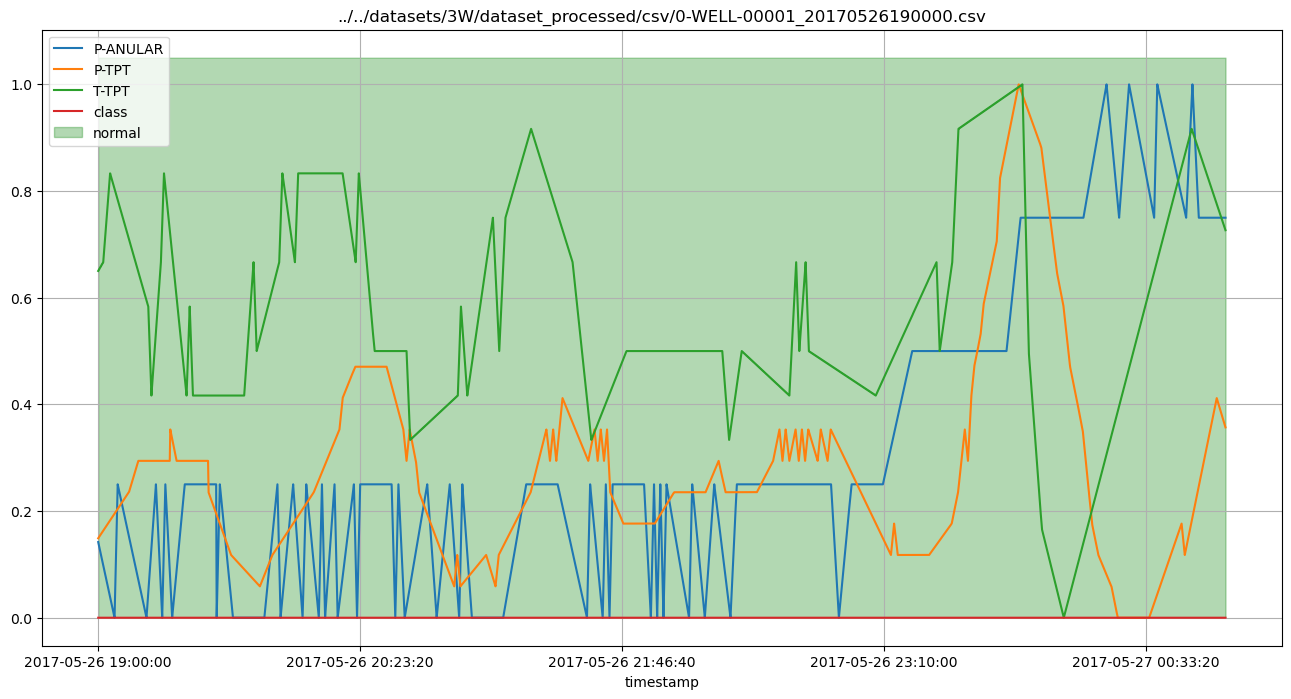

<Figure size 1600x800 with 0 Axes>

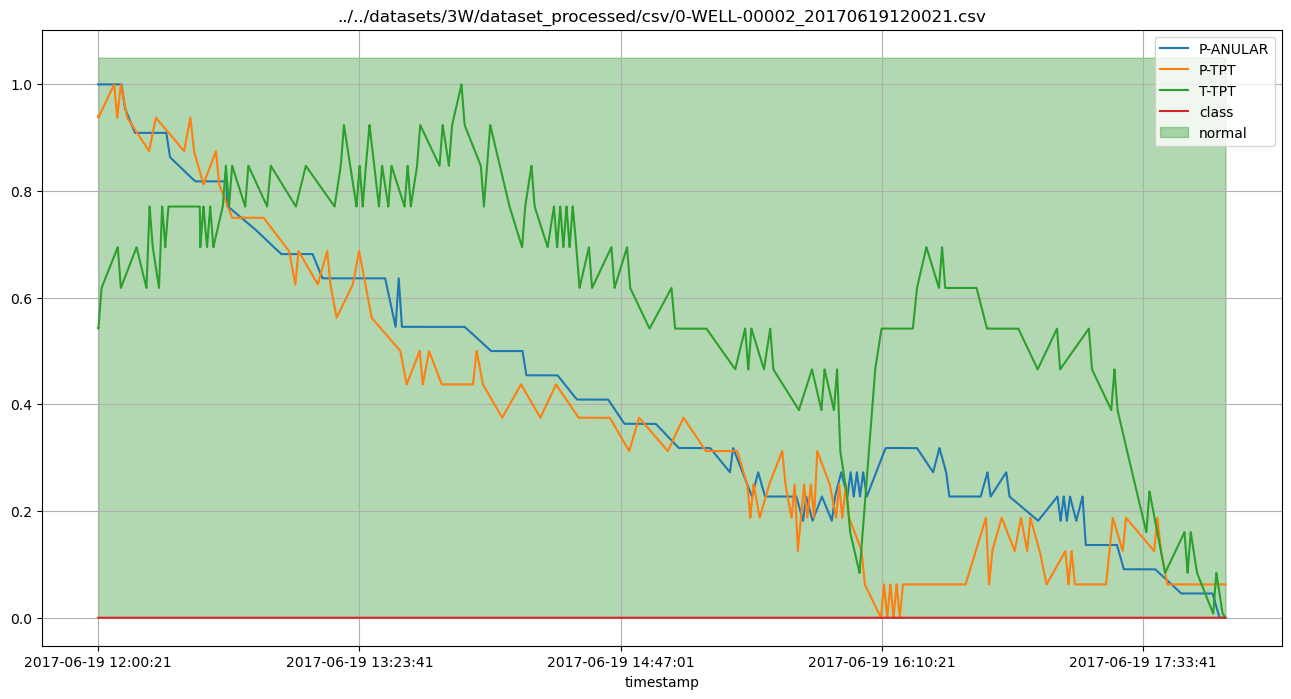

<Figure size 1600x800 with 0 Axes>

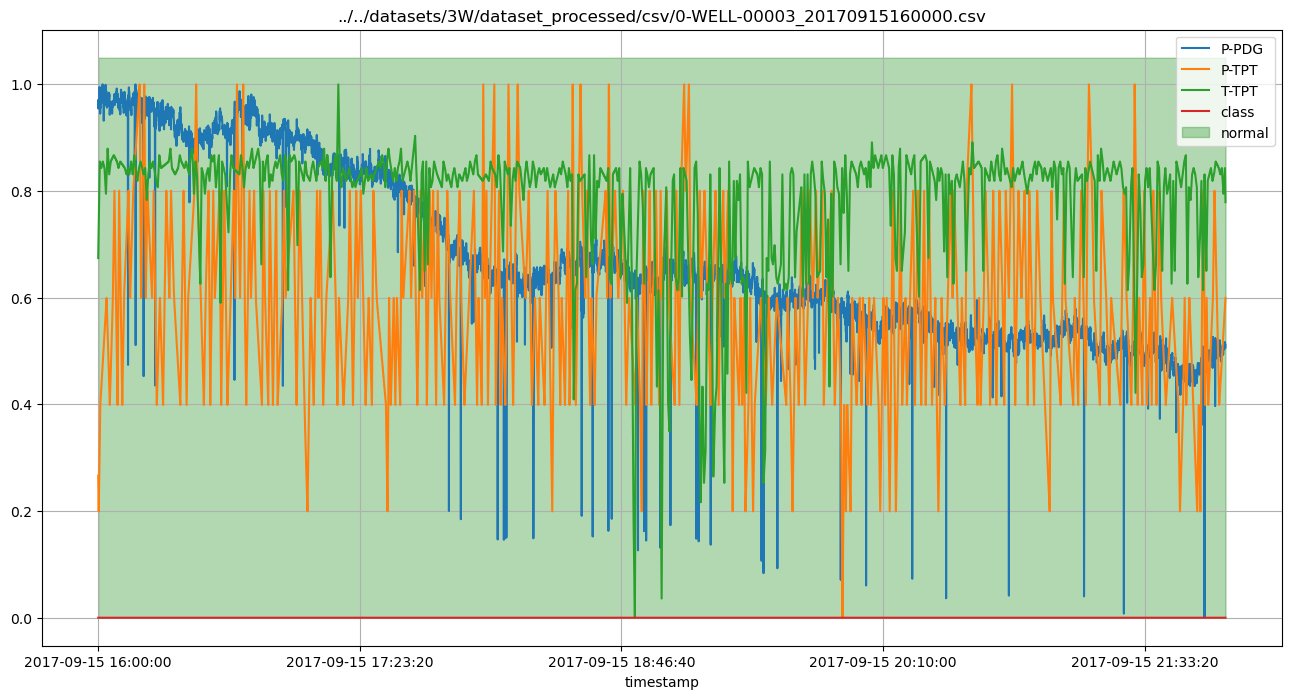

<Figure size 1600x800 with 0 Axes>

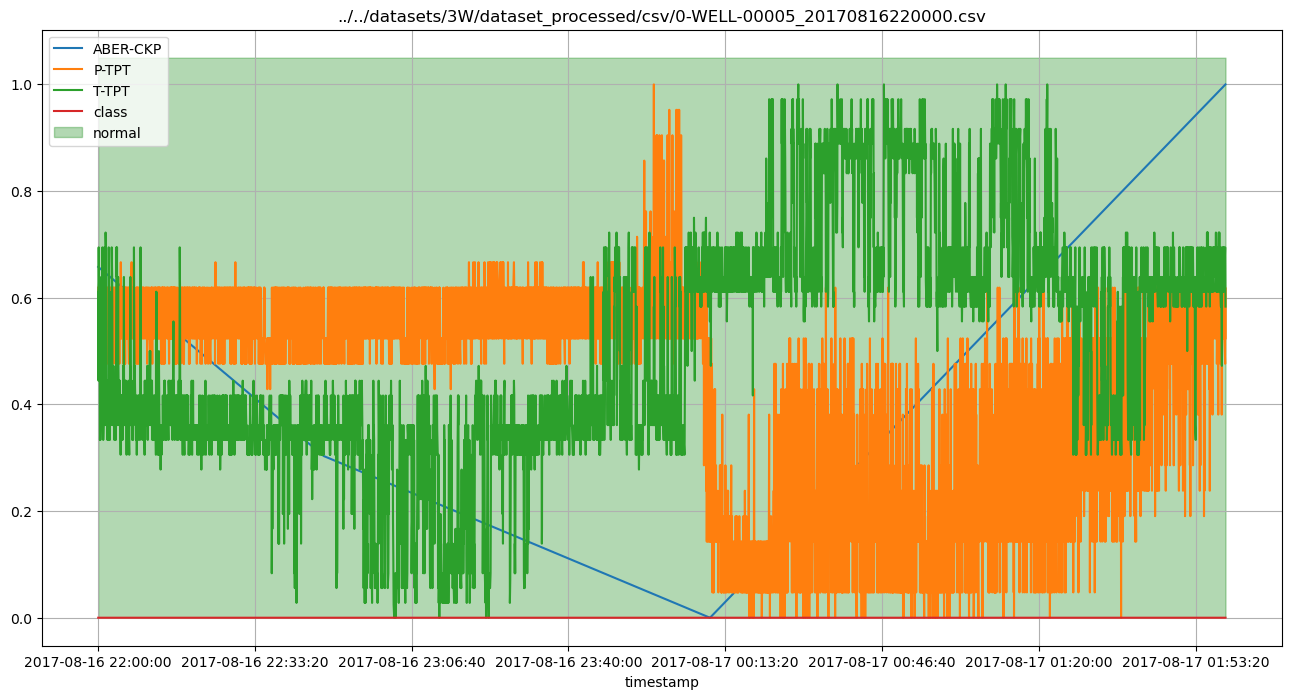

<Figure size 1600x800 with 0 Axes>

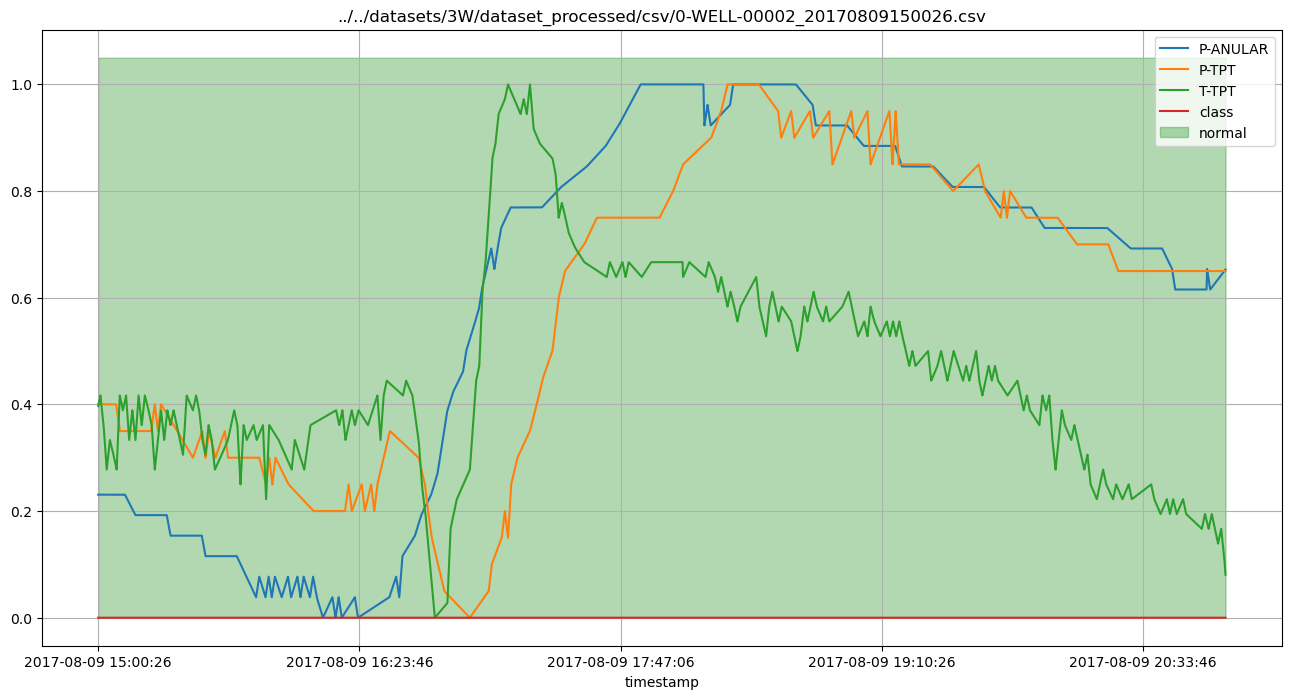

In [56]:
import random

dir_path = "../../datasets/3W/dataset_processed/csv/0"
files = os.listdir(dir_path)
for i in range(5):
    visualize_instance(os.path.join(dir_path, random.choice(files)))

### =========================================================================

In [2]:
def instance_split_train_test(directory, train_split: float):
    files = os.listdir(directory)
    sample_size = 0
    for file in files:
        if os.path.isdir(os.path.join(directory, file)):
            continue
        df = pd.read_csv(os.path.join(directory, file))
        sample_size = sample_size + df.shape[0]
    
    train_size = round(sample_size * train_split)
    test_size = sample_size - train_size

    return sample_size, train_size, test_size


In [11]:
dataset_csv = "../../datasets/3W/dataset_processed/csv/3"
directory_splitted = "../../datasets/3W/dataset_processed/splitted/3"

sample_size, train_size, test_size = instance_split_train_test(dataset_csv, 0.8)

print(sample_size, train_size, test_size)

train_files = []
temp = 0
for files in os.listdir(dataset_csv):
    if os.path.isdir(os.path.join(dataset_csv, files)):
        continue
    df = pd.read_csv(os.path.join(dataset_csv, files))
    temp = temp + df.shape[0]
    train_files.append(files)
    if temp >= train_size:
        break

test_files = list(set(os.listdir(dataset_csv)).difference(train_files))

if not os.path.exists(os.path.join(directory_splitted, "train")):
    os.makedirs(os.path.join(directory_splitted, "train"))

if not os.path.exists(os.path.join(directory_splitted, "test")):
    os.makedirs(os.path.join(directory_splitted, "test"))

for train in train_files:
    shutil.copy(os.path.join(dataset_csv, train), os.path.join(directory_splitted,"train", train))

for test in test_files:
    shutil.copy(os.path.join(dataset_csv, test), os.path.join(directory_splitted,"test", test))

4949279 3959423 989856
